### Demonstration of R9 barcode weights

Data was created using the Icarust simulation profile `config_dnar10_barcoded.toml`a copy of which is in this directory.
A copy of the `config.ini` is also included. The data is 4kHz.

The command used was:

```bash
icarust -s config_dnar10_barcoded.toml -v -p
```

basecalling was performed using `dorado v0.6.2`, with the following command

```bash
./dorado basecaller --kit-name "EXP-NBD104" dna_r10.4.1_e8.2_400bps_fast@v4.0.0 ./raw_data/20240513_1102_XIII_FAQ1234_c42e3d3ba/fast5_pass/ | save -f mixed_ref_test_data.bam
```

And then the barcoding summary was created 

```bash
./dorado demux --emit-summary -o . --no-classify mixed_ref_test_data.bam
```

In [48]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import font_manager
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [49]:
plt.style.use("../dotfiles-rm/thesis/thesis.mplstyle")
font_dir = "../dotfiles-rm/"
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
sns.set_palette("colorblind")
rcParams["font.family"] = "Roboto"

In [50]:
df = pd.read_csv("barcoding_summary.txt", sep="\t")

In [51]:
lookup = {
    "EXP-NBD104_barcode03": "03",
    "EXP-NBD104_barcode02": "02",
    "EXP-NBD104_barcode01": "01",
}
df["barcode"] = df["barcode"].map(lookup)

In [52]:
df.loc[df["barcode"].isnull().values] = "NA"

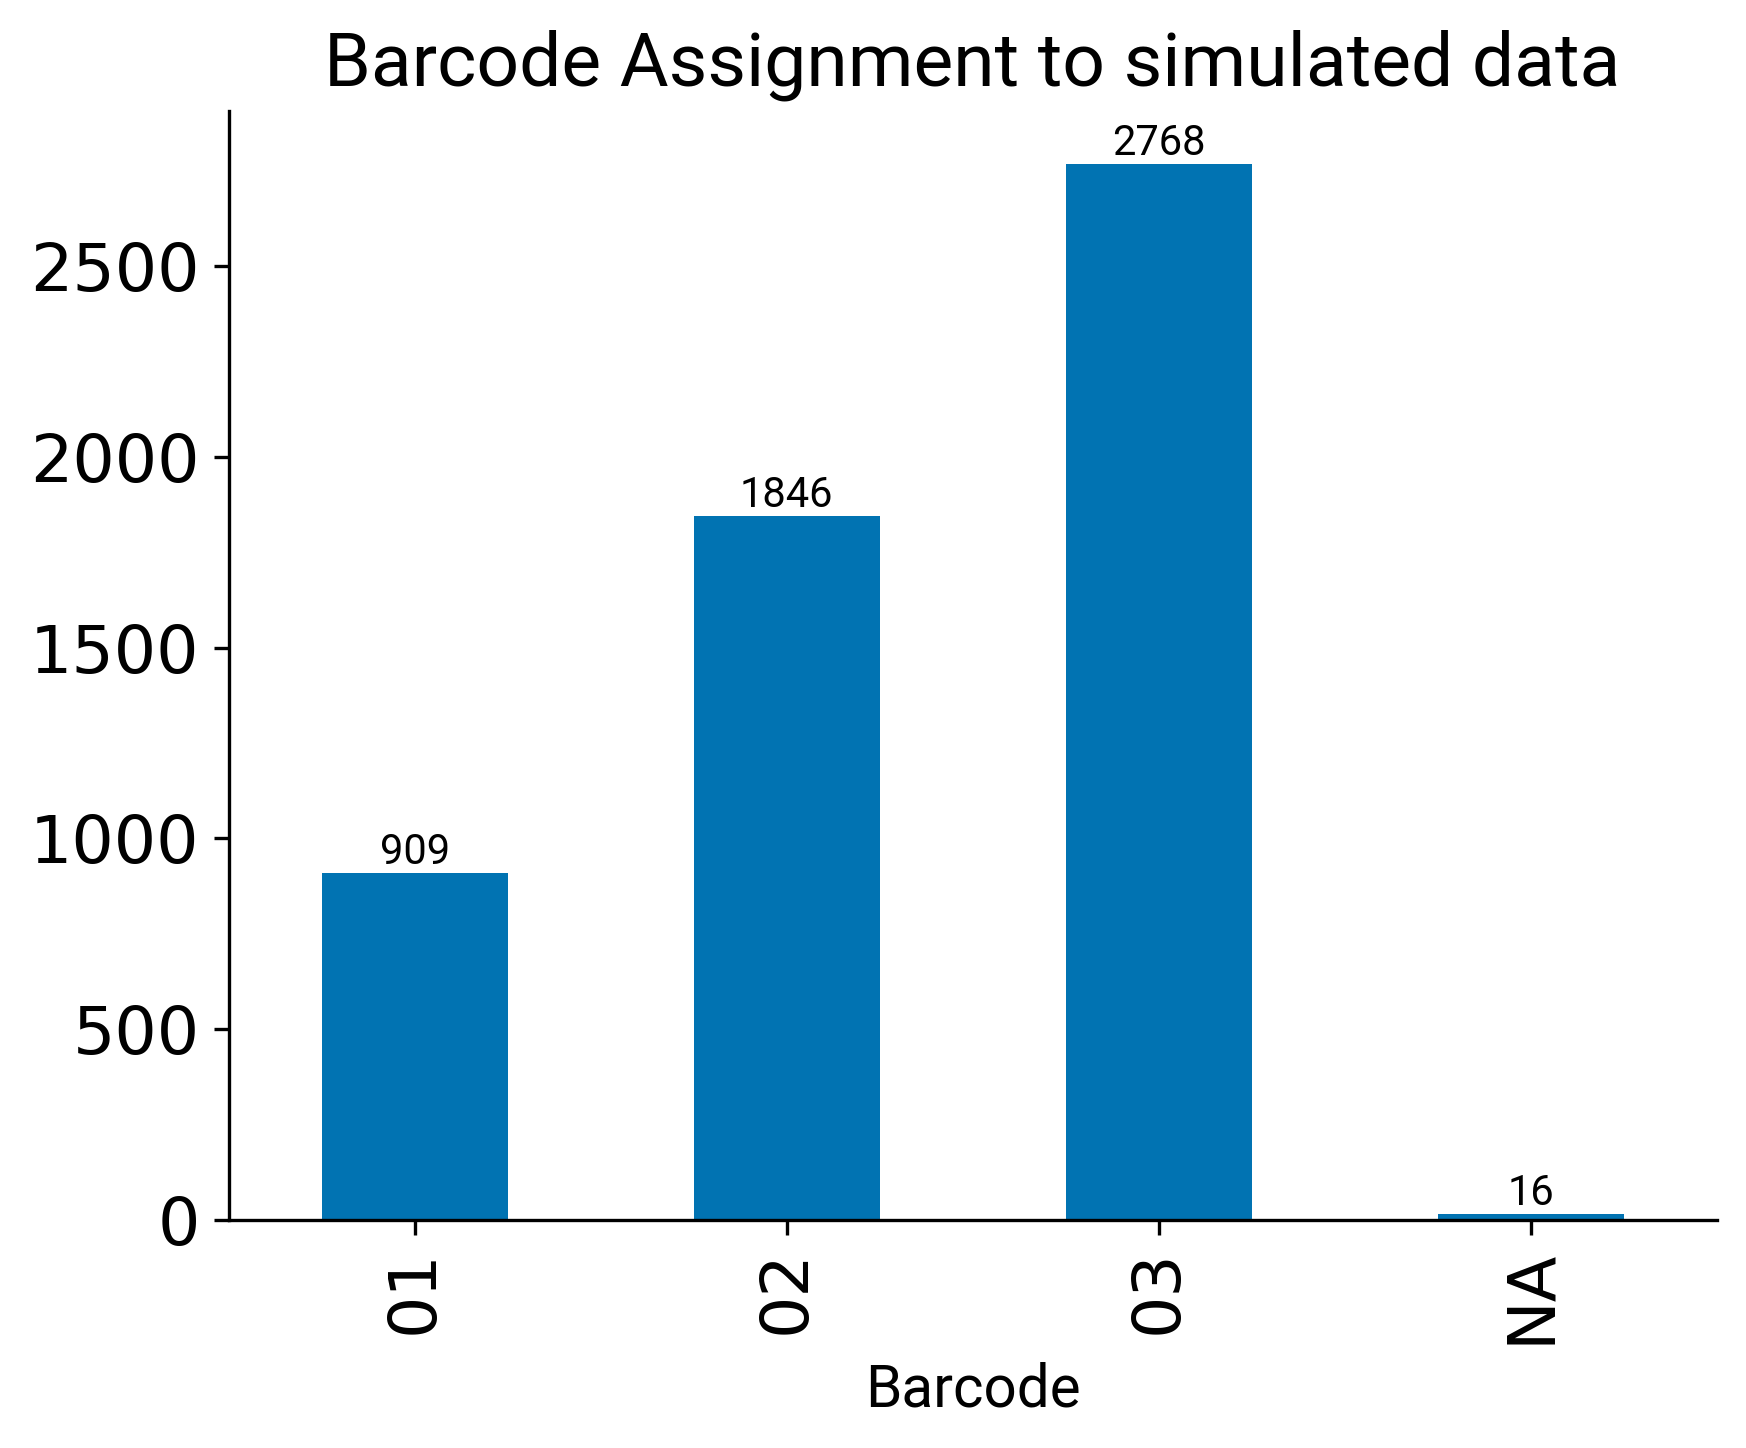

In [53]:
ax = df.groupby("barcode").count()["read_id"].plot.bar()
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xlabel("Barcode")
ax.set_title("Barcode Assignment to simulated data")
fig = ax.get_figure()

In [55]:
fig.savefig("icarust_barcode_dists.svg", bbox_inches="tight")